Number of training images: 256
Number of validation images: 74


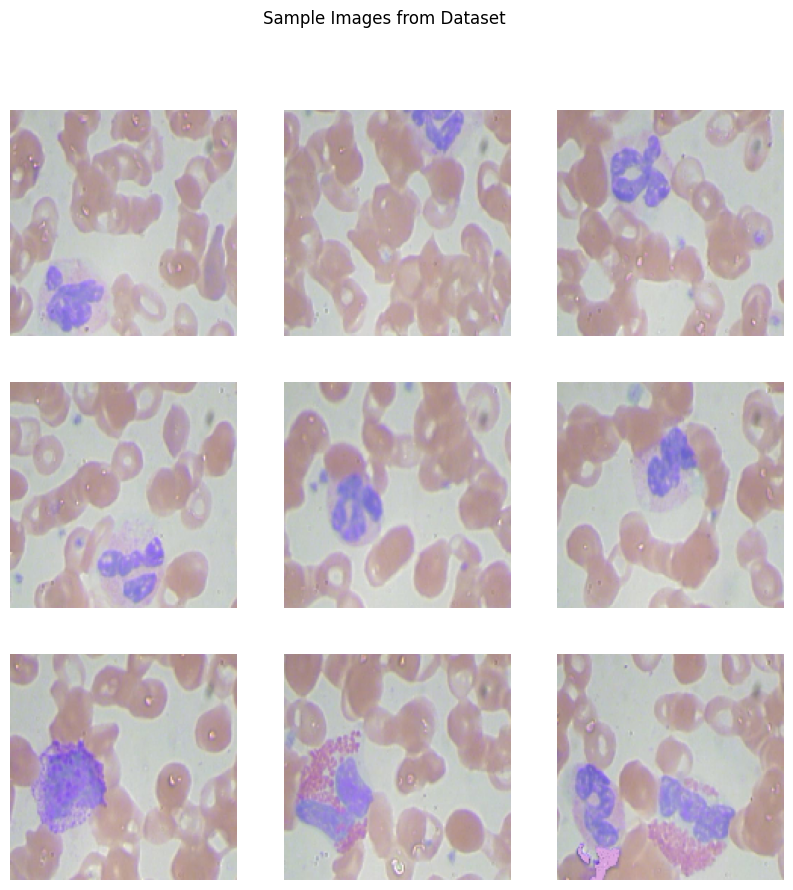

Found 364 images belonging to 3 classes.
Found 364 images belonging to 3 classes.
Number of training images (augmented): 256
Number of validation images: 74


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 430ms/step - accuracy: 0.5780 - loss: 1.1712 - val_accuracy: 0.7005 - val_loss: 0.8682
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.6987 - loss: 0.8447 - val_accuracy: 0.7005 - val_loss: 0.8227
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 497ms/step - accuracy: 0.7307 - loss: 0.7819 - val_accuracy: 0.7005 - val_loss: 0.8041
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - accuracy: 0.6865 - loss: 0.8461 - val_accuracy: 0.7005 - val_loss: 0.8002
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 468ms/step - accuracy: 0.7007 - loss: 0.8360 - val_accuracy: 0.7005 - val_loss: 0.8097


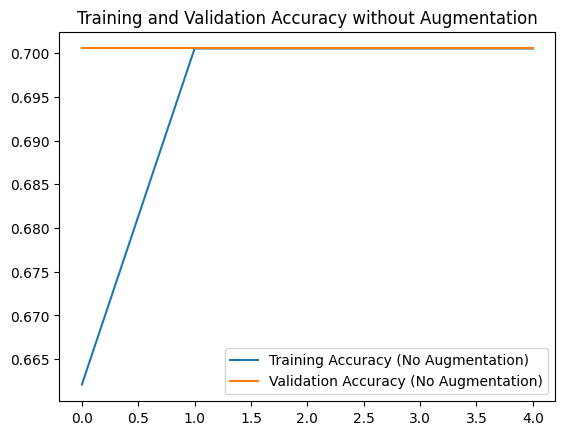

Epoch 1/5


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 613ms/step - accuracy: 0.5622 - loss: 1.1396 - val_accuracy: 0.7005 - val_loss: 0.8376
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 482ms/step - accuracy: 0.7183 - loss: 0.8361 - val_accuracy: 0.7005 - val_loss: 0.8113
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - accuracy: 0.6926 - loss: 0.8180 - val_accuracy: 0.7005 - val_loss: 0.8106
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 507ms/step - accuracy: 0.7303 - loss: 0.7683 - val_accuracy: 0.7005 - val_loss: 0.8257
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 512ms/step - accuracy: 0.6910 - loss: 0.8403 - val_accuracy: 0.7005 - val_loss: 0.8011


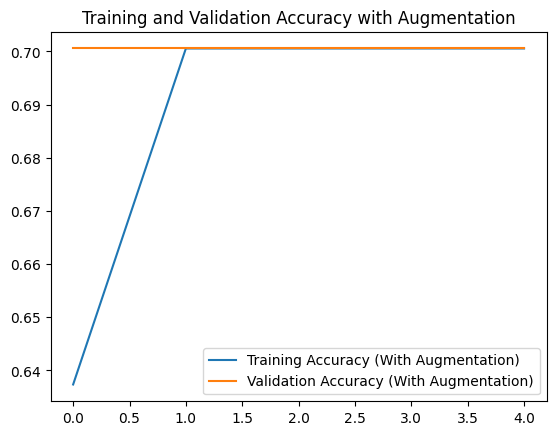

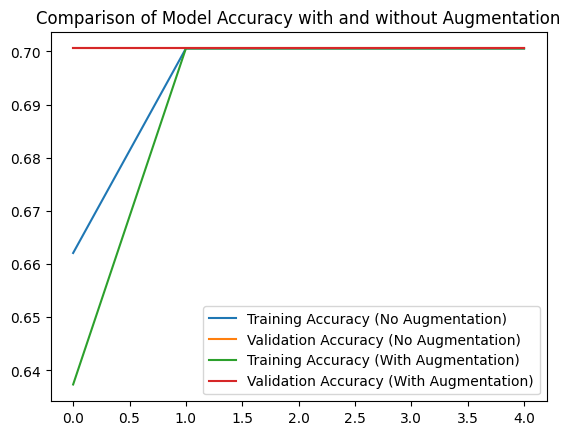

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# a) Load the dataset
base_dir = r"C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\bccd"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# b) Show the number of testing and training images
def count_images(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

train_size = count_images(train_dir)
validation_size = count_images(validation_dir)
print(f"Number of training images: {train_size}")
print(f"Number of validation images: {validation_size}")

# c) Plot some images
def plot_samples(directory, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(os.listdir(directory)[:num_images]):
        img_path = os.path.join(directory, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()

plot_samples(train_dir)

# d) Do image augmentation – contrast, flipping, and rotation
train_datagen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images with augmentation
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify for augmentation
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# e) After augmentation, show the number of testing and training images
print(f"Number of training images (augmented): {train_size}")
print(f"Number of validation images: {validation_size}")

# Normalize the training data using ImageDataGenerator (rescale=1.0/255).

# g) Build a CNN for training without augmentation
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Three classes: WBC, RBC, Platelets
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN without augmentation
history_no_aug = cnn_model.fit(
    validation_generator,  # Without augmentation
    epochs=5,
    validation_data=validation_generator
)

# h) Show training/testing accuracy without augmentation
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.legend()
plt.title("Training and Validation Accuracy without Augmentation")
plt.show()

# i) Build a CNN for training images with augmentation
cnn_model_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Three classes
])

cnn_model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with augmentation
history_aug = cnn_model_aug.fit(
    train_generator_augmented,  # With augmentation
    epochs=5,
    validation_data=validation_generator
)

# j) Show training/testing accuracy with augmentation
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.legend()
plt.title("Training and Validation Accuracy with Augmentation")
plt.show()

# k) Compare training/testing accuracy before and after augmentation
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy (No Augmentation)')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (With Augmentation)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.legend()
plt.title("Comparison of Model Accuracy with and without Augmentation")
plt.show()